# Weighted ECM clustering vs Traditional ECM clustering
## With Seeds dataset


In [7]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.wecm_new import wecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot, calculate_non_specificity, ev_plot_PCA
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from evclust.datasets import load_seeds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Seeds DS: 210 instances, 6 features


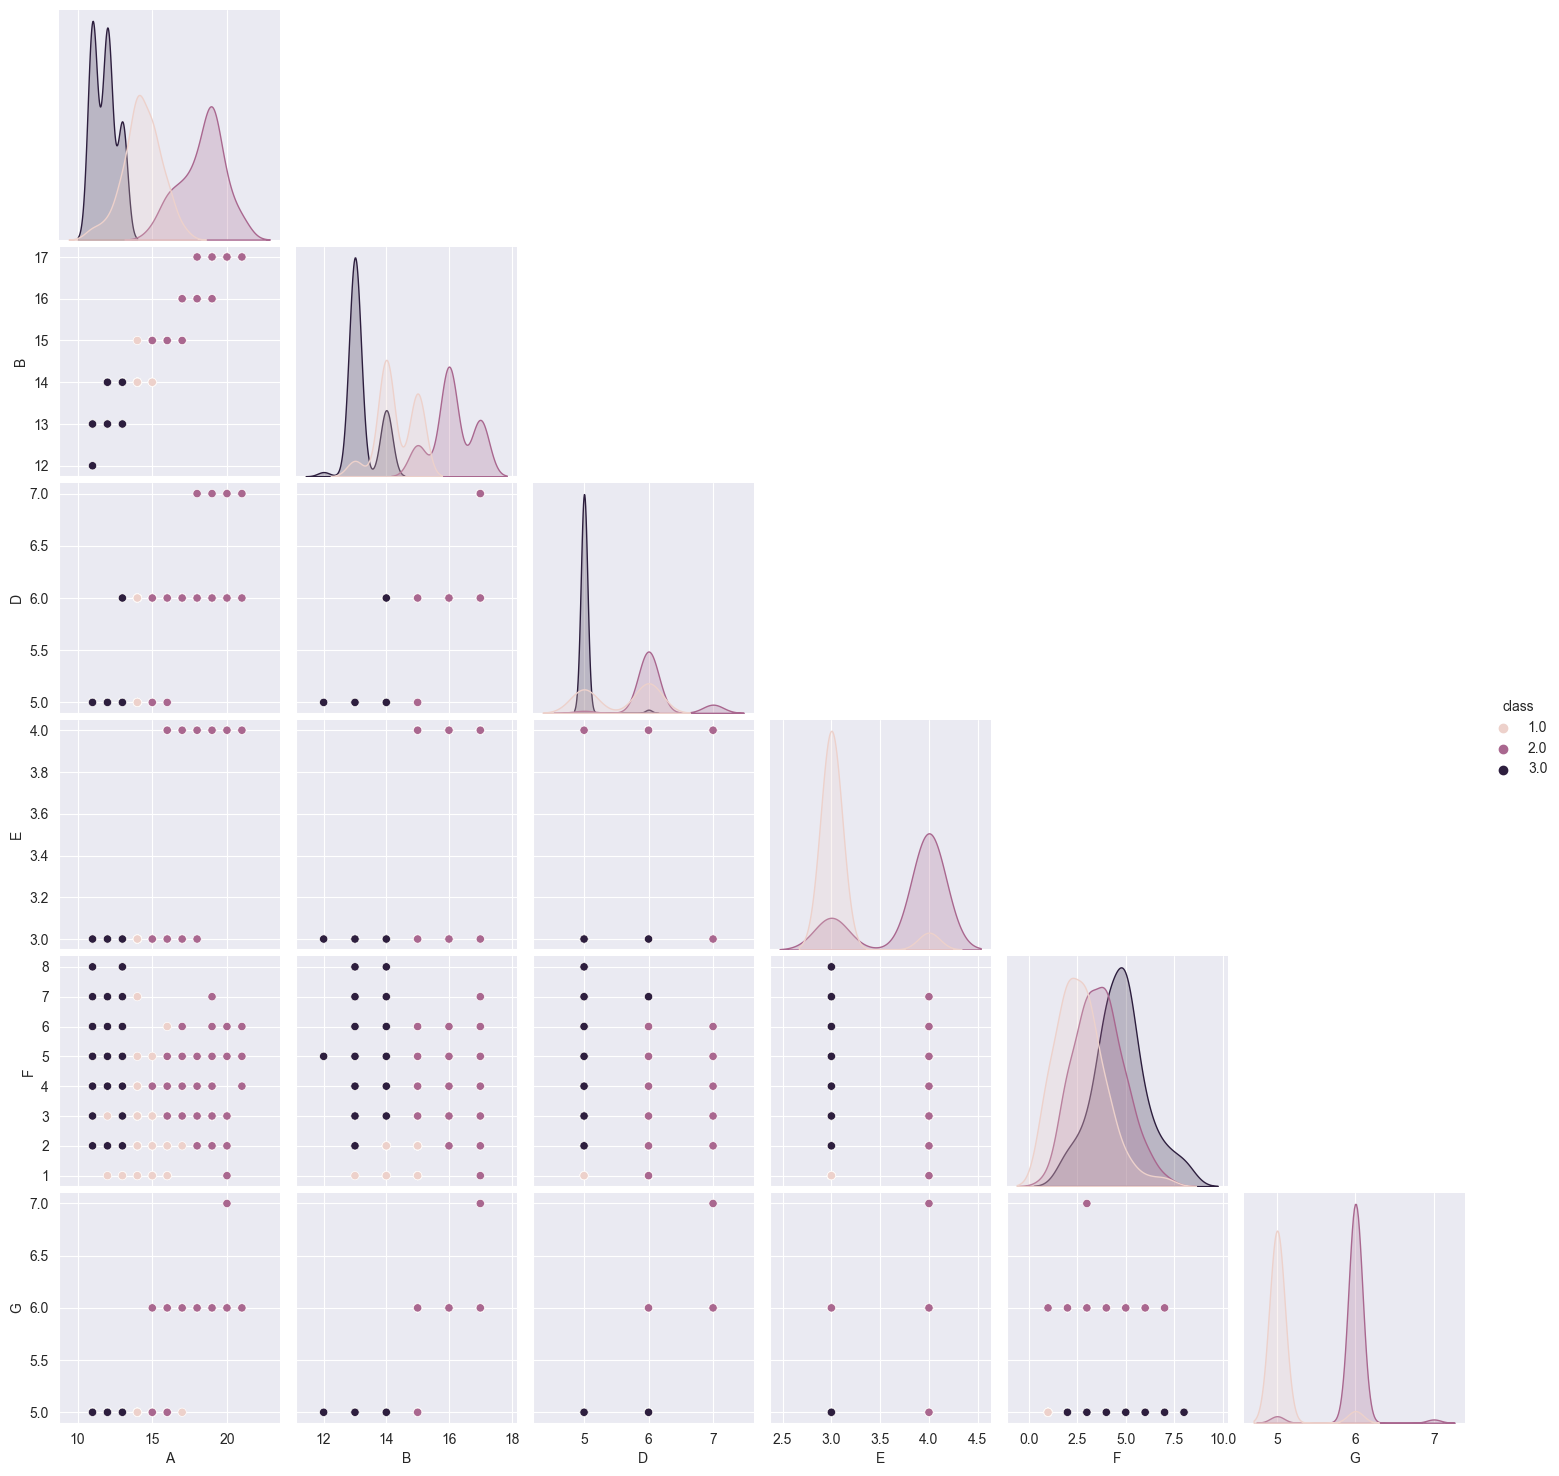

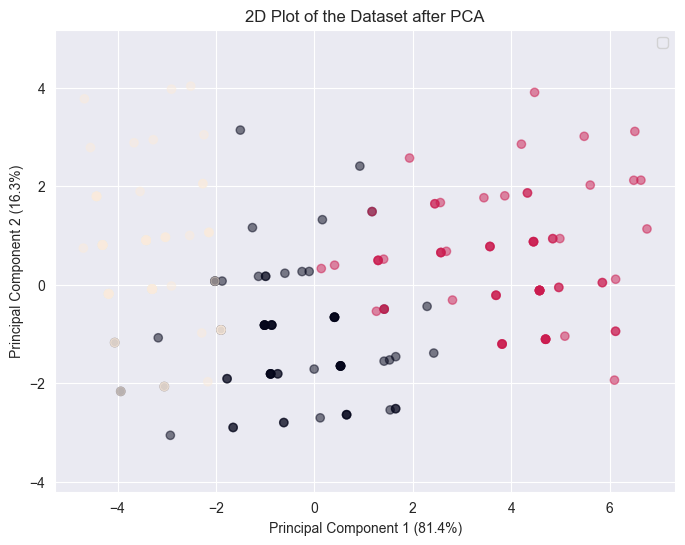

In [8]:
# fetch dataset
df = load_seeds()
df = df.drop(columns=['C'])  # all value equal 1
# data (as pandas dataframes)
y = pd.DataFrame(df.iloc[:, -1])
X = df.iloc[:, :-1]

labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y['class'])

# Scatter matrix plot
sns.pairplot(df, corner=True, hue="class")

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(X)
variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

print(f"Seeds DS: {X.shape[0]} instances, {X.shape[1]} features")
# Plot the reduced dataset with different colors for each cluster
value_to_color = {0: 'green', 1: 'blue', 2: 'red'}
colors = [value_to_color[val] for val in numeric_labels]

plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=numeric_labels)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel(f"Principal Component 1 ({variance_percent[0]}%)")
plt.ylabel(f"Principal Component 2 ({variance_percent[1]}%)")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


## Traditional ECM

In [14]:
# Traditional ECM clustering
model = ecm(x=X, c=3, beta=2, alpha=1, delta=100, ntrials=10)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Jbest: {model['crit']}")
print(f"Centers: \n {model['g']}")

print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

[1, 288.7625423323275]
[2, 280.80404325434984]
[3, 279.67865784923646]
[4, 279.3696677223972]
[5, 279.2317332960023]
[6, 279.14874575915013]
[7, 279.09014490936863]
[8, 279.0457800540676]
[9, 279.0114156736233]
[10, 278.98472449251227]
[11, 278.9640943387224]
[12, 278.9482644940826]
[13, 278.9362095311495]
[14, 278.9270937855111]
[15, 278.9202437677518]
[16, 278.9151243721044]
[17, 278.91131628132115]
[18, 278.9084949270739]
[19, 278.90641171810574]
[20, 278.9048779461728]
[21, 278.90375142992036]
[22, 278.9029257133023]
[  0.         278.90292571 278.90292571]
[1, 288.7625423323275]
[2, 280.80404325434984]
[3, 279.67865784923646]
[4, 279.3696677223972]
[5, 279.2317332960023]
[6, 279.14874575915013]
[7, 279.09014490936863]
[8, 279.0457800540676]
[9, 279.0114156736233]
[10, 278.98472449251227]
[11, 278.9640943387224]
[12, 278.9482644940826]
[13, 278.9362095311495]
[14, 278.9270937855111]
[15, 278.9202437677518]
[16, 278.9151243721044]
[17, 278.91131628132115]
[18, 278.9084949270739]
[19

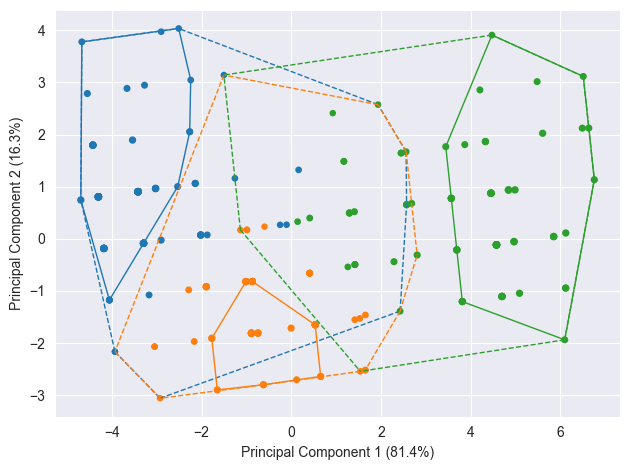

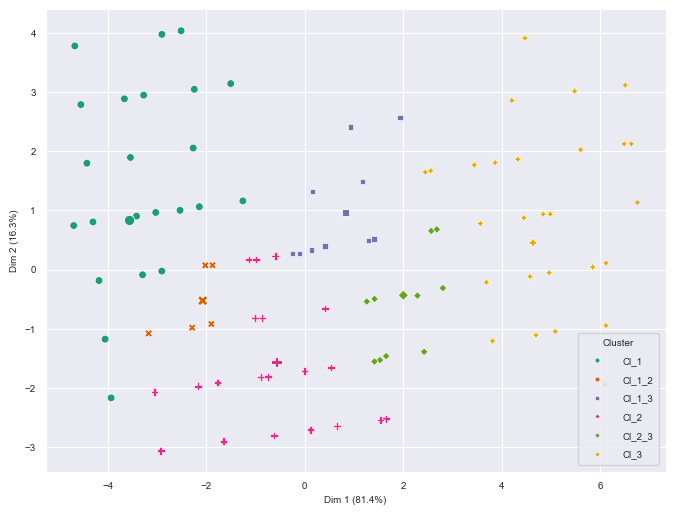

In [15]:
# Plots
ev_plot_PCA(model, X=X, cex=20)
ev_pcaplot(data=X, x=model, normalize=False, cex=30)

## Weighted ECM (W ECM)

In [11]:
# Feature weighted ECM clustering
W = np.array([
    [0.07197209, 0.51605783, 0.11821111, 0.20893455, 0.01398744, 0.07083698],
    [0.06738635, 0.02027021, 0.35386533, 0.02805789, 0.12012324, 0.41029698],
    [0.0410078, 0.1919464, 0.01633889, 0.22999487, 0.18923781, 0.33147423]
])
c = 3
model = wecm(x=X, c=c, W=W, beta=2, alpha=1, delta=100, ntrials=10, epsi=1e-3)

true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

# Compute the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Weighted ECM----------")
print(f"Jbest: {model['crit']}")
print(f"Centers: \n {model['g']}")
print(f"Final weights: \n{model['W']}")

print(f"Adjusted Rand Index (ARI): {ari} - J value: {model['crit']}")

# Calculate Non-specificity
calculate_non_specificity(model)

Initial weights: 
 [[0.07197209 0.51605783 0.11821111 0.20893455 0.01398744 0.07083698]
 [0.06738635 0.02027021 0.35386533 0.02805789 0.12012324 0.41029698]
 [0.0410078  0.1919464  0.01633889 0.22999487 0.18923781 0.33147423]]
---------Iteration #1---------
Initial prototypes: 
 [[11.85526316 13.23684211  5.02631579  3.          4.71052632  5.        ]
 [18.73770492 16.29508197  6.13114754  3.8852459   3.60655738  6.        ]
 [14.63013699 14.46575342  5.61643836  3.08219178  2.67123288  5.16438356]]
[1, 4.317540855117454]
[2, 3.629881779224105]
[3, 3.5620253227134304]
[4, 3.5367061767291648]
[5, 3.523449650867687]
[6, 3.5174273270544507]
[7, 3.5150052766410034]
[8, 3.514026729099831]
[0.         3.51402673 3.51402673]
---------End Iteration #1---------
---------Iteration #2---------
Initial prototypes: 
 [[11.85526316 13.23684211  5.02631579  3.          4.71052632  5.        ]
 [14.63013699 14.46575342  5.61643836  3.08219178  2.67123288  5.16438356]
 [18.73770492 16.29508197  6.1311

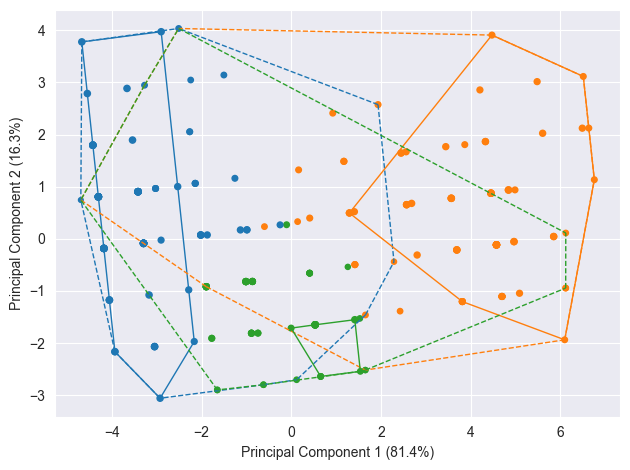

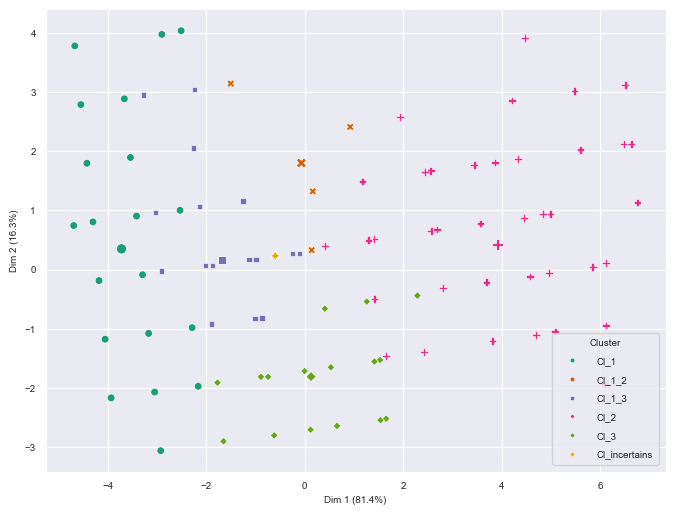

Covariance Matrix 1: [0.64612676 0.16901408 0.01388889 0.         2.19229264 0.        ]
Covariance Matrix 2: [2.54245614 0.49175439 0.11140351 0.20263158 1.58368421 0.06508772]
Covariance Matrix 3: [1.05473295 0.22765732 0.25383395 0.07535695 0.97435219 0.        ]


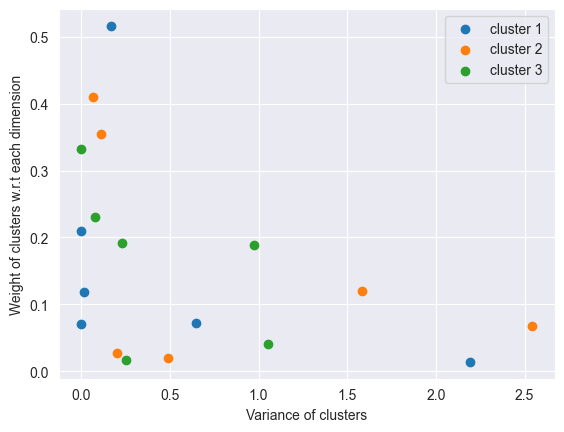

In [13]:
# Plots
ev_plot_PCA(model, X=X, cex=20)
ev_pcaplot(data=X, x=model, normalize=False, cex=30)

W = model['W']
cov_mat1 = np.cov(X[predicted_labels == 0].transpose())
cov_mat2 = np.cov(X[predicted_labels == 1].transpose())
cov_mat3 = np.cov(X[predicted_labels == 2].transpose())
print(f"Covariance Matrix 1: {cov_mat1.diagonal()}")
print(f"Covariance Matrix 2: {cov_mat2.diagonal()}")
print(f"Covariance Matrix 3: {cov_mat3.diagonal()}")

W_COV_1 = pd.DataFrame({'y': W[0, :], 'x': cov_mat1.diagonal()})
W_COV_1.sort_values('x', inplace=True)
W_COV_2 = pd.DataFrame({'y': W[1, :], 'x': cov_mat2.diagonal()})
W_COV_2.sort_values('x', inplace=True)
W_COV_3 = pd.DataFrame({'y': W[2, :], 'x': cov_mat3.diagonal()})
W_COV_3.sort_values('x', inplace=True)

plt.clf()
plt.scatter(W_COV_1['x'], W_COV_1['y'], label="cluster 1", marker='o')
plt.scatter(W_COV_2['x'], W_COV_2['y'], label="cluster 2", marker='o')
plt.scatter(W_COV_3['x'], W_COV_3['y'], label="cluster 3", marker='o')
plt.xlabel("Variance of clusters")
plt.ylabel("Weight of clusters w.r.t each dimension")
plt.legend()
plt.show()


## Non-specificity equation
![test.png](../assets/normlaized-non-specificity.png)